In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation
from tensorflow.python.keras import metrics
from sklearn.preprocessing import StandardScaler
from tensorflow.python import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from keras.layers import LSTM, Flatten
from sklearn.metrics import f1_score ## F1 Score 구하기
from sklearn.metrics import precision_recall_fscore_support as sk
import keras.backend as K

In [2]:
df=pd.read_excel('Continous_2weeks_2day_1term.xlsx')

X = df.iloc[:,[1,3,4,5,6,7]]
y = df.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [3]:
#결과 넣을 배열
Result = [[0 for j in range(4)] for i in range(10)]
CMResult = [[[0 for k in range(3)]for j in range(3)] for i in range(10)]
pred_list = []
LossResult = [[0 for j in range(100)] for i in range(10)]
AccuracyResult = [[0 for j in range(100)] for i in range(10)]


In [4]:
#한 사람당 데이터 수
Count_1 = int(181*0.1)
#한 사람당 데이터 수
Count_2 = 181

In [5]:
X_test = pd.DataFrame()
X_train = pd.DataFrame()
y_test = pd.DataFrame()
y_train = pd.DataFrame()
empty = pd.DataFrame()

#결과 넣을 배열
Result = [[0 for j in range(4)] for i in range(10)]

In [6]:
K.clear_session()
model = Sequential()
#input_shpae(time_step, daata_dim)
model.add(LSTM(32,  input_shape=(6,6), return_sequences=True))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 32s 4ms/step - loss: 1.0238 - accuracy: 0.4552 - val_loss: 1.0405 - val_accuracy: 0.3939
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.9953 - accuracy: 0.4742 - val_loss: 1.0455 - val_accuracy: 0.4126
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.9663 - accuracy: 0.4952 - val_loss: 1.0806 - val_accuracy: 0.3921
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.9403 - accuracy: 0.5205 - val_loss: 1.1133 - val_accuracy: 0.4071
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.9198 - accuracy: 0.5368 - val_loss: 1.1035 - val_accuracy: 0.4367
Epoch 6/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.9007 - accuracy: 0.5502 - val_loss: 1.0911 - val_accuracy: 0.4297
Epoch 7/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.8835 - accuracy: 0.5646 - val_lo

Epoch 57/100
8320/8320 [==============================] - 28s 3ms/step - loss: 0.7376 - accuracy: 0.6616 - val_loss: 1.2686 - val_accuracy: 0.4401
Epoch 58/100
8320/8320 [==============================] - 28s 3ms/step - loss: 0.7407 - accuracy: 0.6583 - val_loss: 1.2501 - val_accuracy: 0.4364
Epoch 59/100
8320/8320 [==============================] - 28s 3ms/step - loss: 0.7390 - accuracy: 0.6587 - val_loss: 1.2658 - val_accuracy: 0.4475
Epoch 60/100
8320/8320 [==============================] - 28s 3ms/step - loss: 0.7382 - accuracy: 0.6583 - val_loss: 1.2770 - val_accuracy: 0.4305
Epoch 61/100
8320/8320 [==============================] - 28s 3ms/step - loss: 0.7400 - accuracy: 0.6592 - val_loss: 1.2709 - val_accuracy: 0.4242
Epoch 62/100
8320/8320 [==============================] - 28s 3ms/step - loss: 0.7397 - accuracy: 0.6584 - val_loss: 1.2746 - val_accuracy: 0.4385
Epoch 63/100
8320/8320 [==============================] - 28s 3ms/step - loss: 0.7366 - accuracy: 0.6615 - val_loss: 1

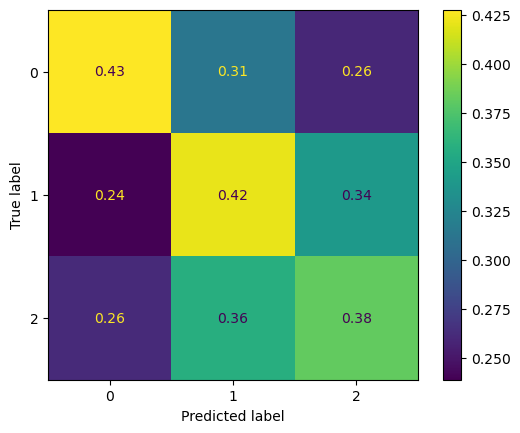

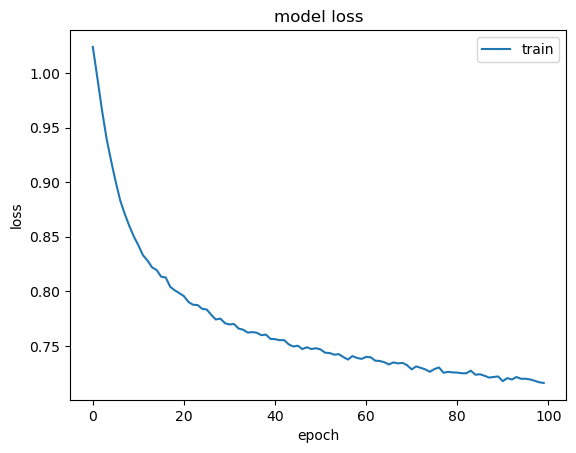

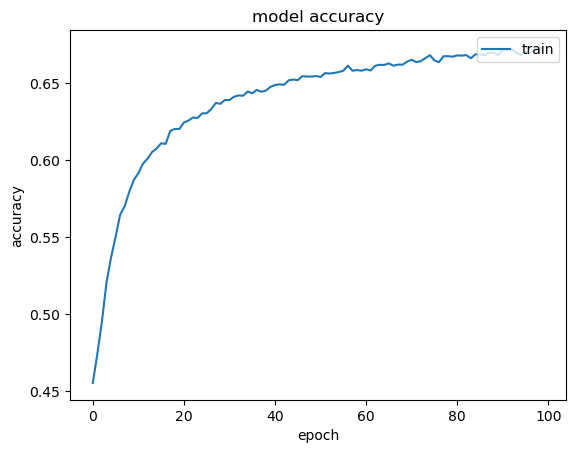

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 30s 4ms/step - loss: 0.7164 - accuracy: 0.6738 - val_loss: 1.0619 - val_accuracy: 0.5274
Epoch 2/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.7142 - accuracy: 0.6741 - val_loss: 1.0629 - val_accuracy: 0.5258
Epoch 3/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.7154 - accuracy: 0.6748 - val_loss: 1.0462 - val_accuracy: 0.5343
Epoch 4/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.7207 - accuracy: 0.6714 - val_loss: 1.0273 - val_accuracy: 0.5363
Epoch 5/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.7145 - accuracy: 0.6741 - val_loss: 1.0588 - val_accuracy: 0.5207
Epoch 6/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.7158 - accuracy: 0.6728 - val_loss: 1.0637 - val_accuracy: 0.5345
Epoch 7/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.7138 - accuracy: 0.6750 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6980 - accuracy: 0.6830 - val_loss: 1.1029 - val_accuracy: 0.5163
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.7018 - accuracy: 0.6822 - val_loss: 1.0939 - val_accuracy: 0.5237
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.7010 - accuracy: 0.6822 - val_loss: 1.1119 - val_accuracy: 0.5145
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6983 - accuracy: 0.6852 - val_loss: 1.1248 - val_accuracy: 0.5105
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.7033 - accuracy: 0.6814 - val_loss: 1.0874 - val_accuracy: 0.5314
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.7021 - accuracy: 0.6823 - val_loss: 1.0686 - val_accuracy: 0.5300
Epoch 63/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.7017 - accuracy: 0.6817 - val_loss: 1

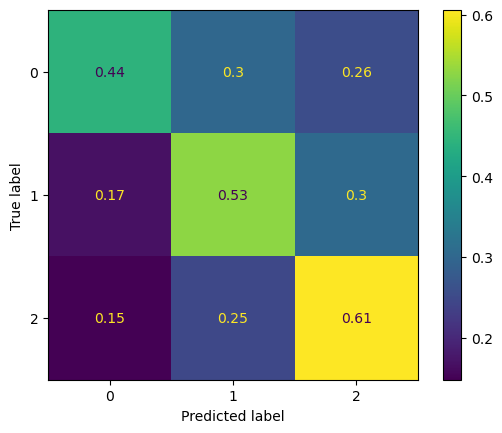

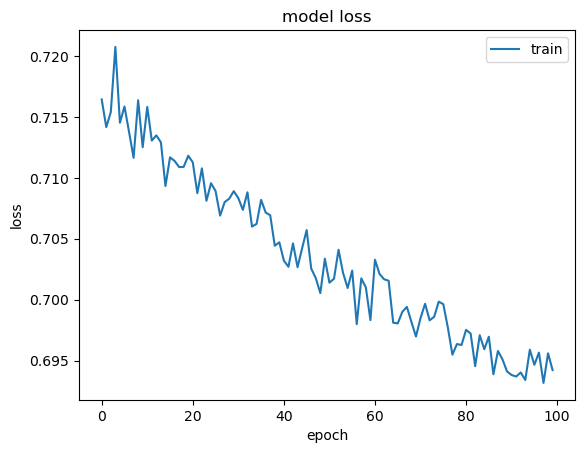

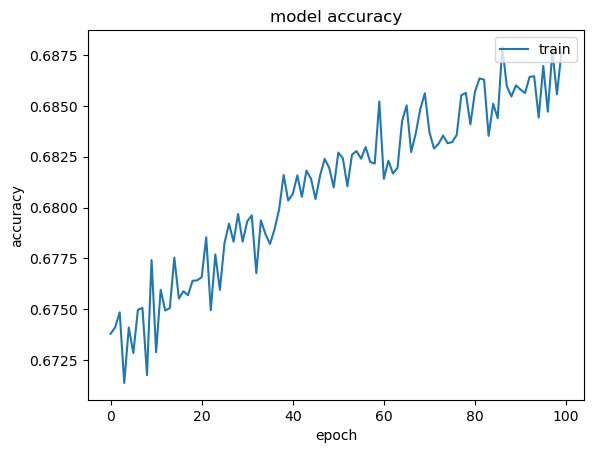

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6920 - accuracy: 0.6880 - val_loss: 1.1905 - val_accuracy: 0.4701
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6945 - accuracy: 0.6866 - val_loss: 1.1832 - val_accuracy: 0.4698
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6922 - accuracy: 0.6871 - val_loss: 1.2101 - val_accuracy: 0.4635
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6928 - accuracy: 0.6883 - val_loss: 1.1677 - val_accuracy: 0.4711
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6927 - accuracy: 0.6869 - val_loss: 1.2202 - val_accuracy: 0.4690
Epoch 6/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6924 - accuracy: 0.6868 - val_loss: 1.1924 - val_accuracy: 0.4716
Epoch 7/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6917 - accuracy: 0.6888 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6829 - accuracy: 0.6924 - val_loss: 1.2015 - val_accuracy: 0.4707
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6860 - accuracy: 0.6915 - val_loss: 1.1972 - val_accuracy: 0.4767
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6864 - accuracy: 0.6909 - val_loss: 1.2120 - val_accuracy: 0.4802
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6874 - accuracy: 0.6918 - val_loss: 1.2426 - val_accuracy: 0.4558
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6866 - accuracy: 0.6894 - val_loss: 1.1948 - val_accuracy: 0.4721
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6852 - accuracy: 0.6907 - val_loss: 1.1604 - val_accuracy: 0.4863
Epoch 63/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6844 - accuracy: 0.6914 - val_loss: 1

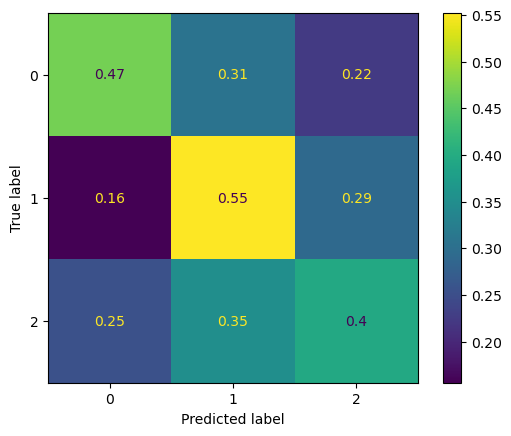

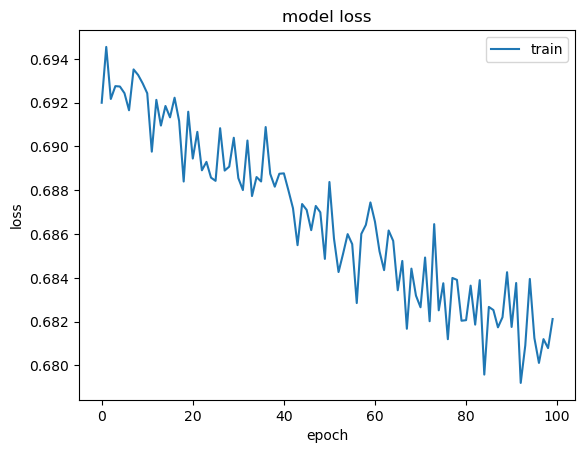

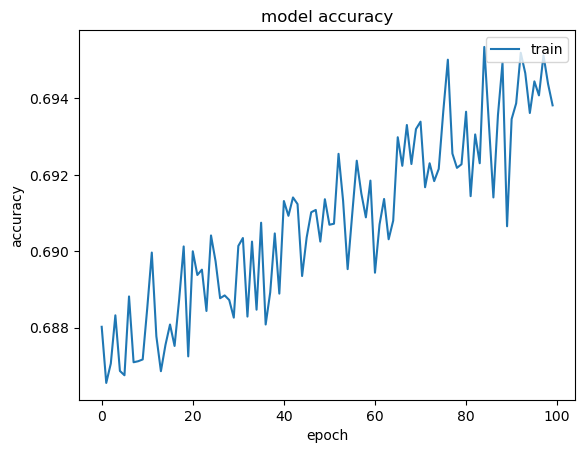

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6805 - accuracy: 0.6940 - val_loss: 1.1768 - val_accuracy: 0.5026
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6819 - accuracy: 0.6941 - val_loss: 1.1527 - val_accuracy: 0.5019
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6843 - accuracy: 0.6917 - val_loss: 1.1685 - val_accuracy: 0.5035
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6811 - accuracy: 0.6946 - val_loss: 1.2097 - val_accuracy: 0.4835
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6810 - accuracy: 0.6952 - val_loss: 1.1608 - val_accuracy: 0.5061
Epoch 6/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6820 - accuracy: 0.6936 - val_loss: 1.1850 - val_accuracy: 0.4957
Epoch 7/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6807 - accuracy: 0.6941 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6787 - accuracy: 0.6958 - val_loss: 1.1860 - val_accuracy: 0.4938
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6799 - accuracy: 0.6948 - val_loss: 1.2147 - val_accuracy: 0.4849
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6772 - accuracy: 0.6962 - val_loss: 1.2092 - val_accuracy: 0.4858
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6768 - accuracy: 0.6962 - val_loss: 1.1873 - val_accuracy: 0.4909
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6789 - accuracy: 0.6945 - val_loss: 1.2118 - val_accuracy: 0.4828
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6791 - accuracy: 0.6949 - val_loss: 1.1982 - val_accuracy: 0.4934
Epoch 63/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6775 - accuracy: 0.6963 - val_loss: 1

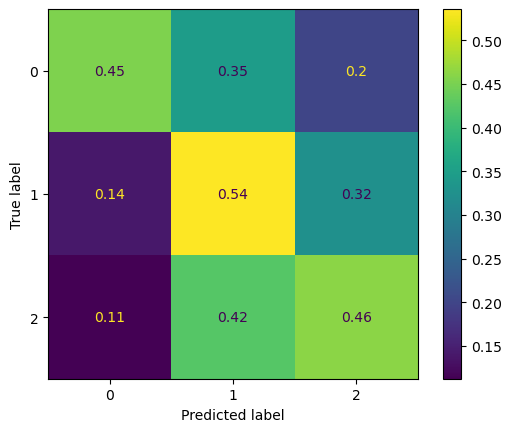

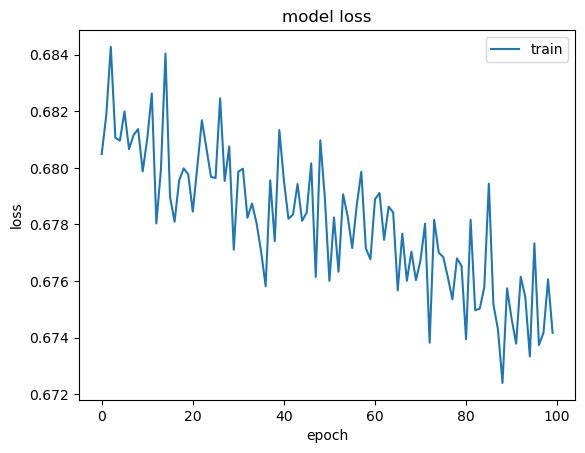

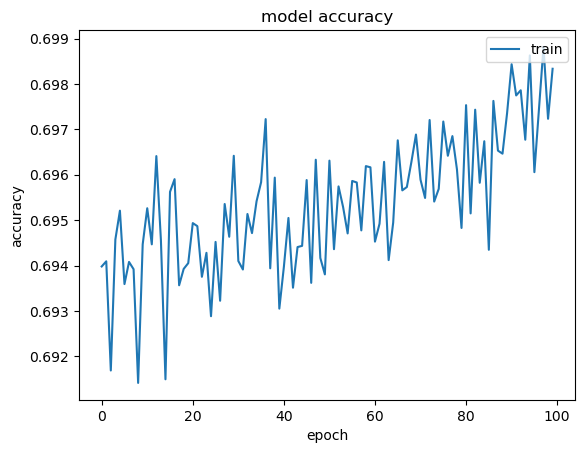

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6755 - accuracy: 0.6967 - val_loss: 1.1508 - val_accuracy: 0.4943
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6737 - accuracy: 0.6978 - val_loss: 1.1286 - val_accuracy: 0.5068
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6758 - accuracy: 0.6966 - val_loss: 1.1519 - val_accuracy: 0.4807
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6758 - accuracy: 0.6968 - val_loss: 1.1560 - val_accuracy: 0.4972
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6751 - accuracy: 0.6980 - val_loss: 1.1326 - val_accuracy: 0.5043
Epoch 6/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6729 - accuracy: 0.6985 - val_loss: 1.1274 - val_accuracy: 0.5103
Epoch 7/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6753 - accuracy: 0.6963 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6722 - accuracy: 0.6981 - val_loss: 1.1685 - val_accuracy: 0.4795
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6724 - accuracy: 0.6990 - val_loss: 1.1290 - val_accuracy: 0.4982
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6726 - accuracy: 0.6985 - val_loss: 1.1001 - val_accuracy: 0.5150
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6721 - accuracy: 0.6984 - val_loss: 1.1103 - val_accuracy: 0.5064
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6699 - accuracy: 0.7011 - val_loss: 1.1539 - val_accuracy: 0.4895
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6748 - accuracy: 0.6977 - val_loss: 1.1531 - val_accuracy: 0.5009
Epoch 63/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6744 - accuracy: 0.6971 - val_loss: 1

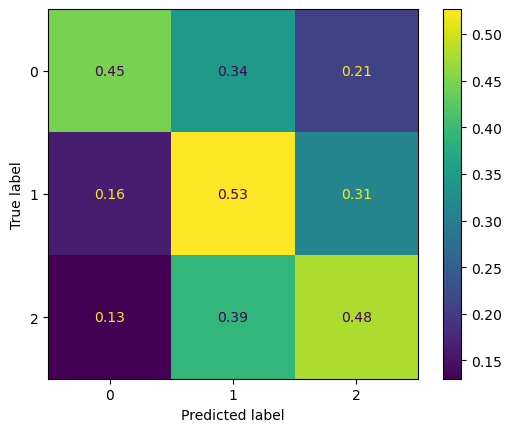

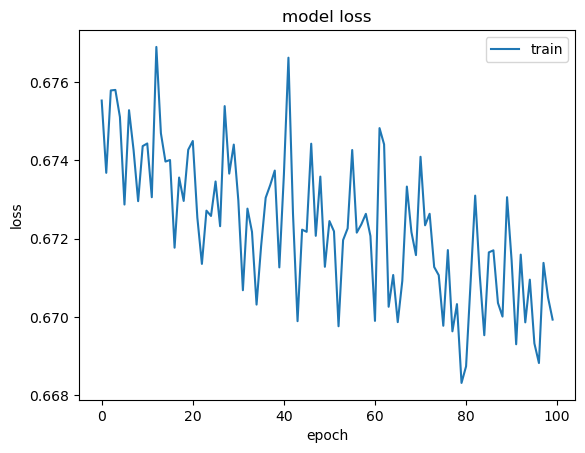

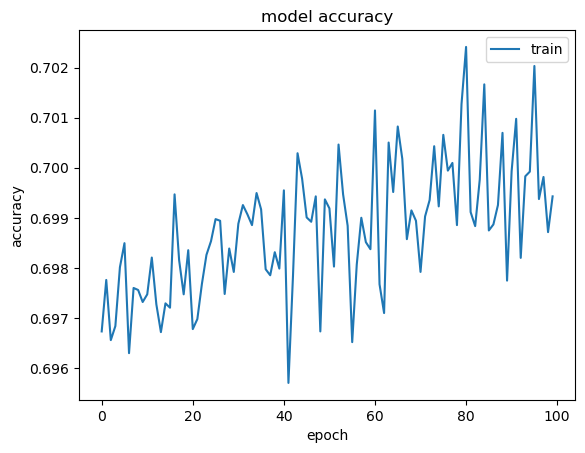

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 29s 4ms/step - loss: 0.6702 - accuracy: 0.6997 - val_loss: 1.3747 - val_accuracy: 0.4110
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6690 - accuracy: 0.7001 - val_loss: 1.3364 - val_accuracy: 0.4269
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6699 - accuracy: 0.7005 - val_loss: 1.3639 - val_accuracy: 0.4270
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6682 - accuracy: 0.7012 - val_loss: 1.3840 - val_accuracy: 0.4167
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6710 - accuracy: 0.7001 - val_loss: 1.3500 - val_accuracy: 0.4272
Epoch 6/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6695 - accuracy: 0.7008 - val_loss: 1.3243 - val_accuracy: 0.4419
Epoch 7/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6705 - accuracy: 0.6987 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6664 - accuracy: 0.7041 - val_loss: 1.3621 - val_accuracy: 0.4448
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6676 - accuracy: 0.7017 - val_loss: 1.3435 - val_accuracy: 0.4448
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6700 - accuracy: 0.6999 - val_loss: 1.3783 - val_accuracy: 0.4303
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6690 - accuracy: 0.7002 - val_loss: 1.3538 - val_accuracy: 0.4451
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6666 - accuracy: 0.7028 - val_loss: 1.3546 - val_accuracy: 0.4388
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6677 - accuracy: 0.7026 - val_loss: 1.3633 - val_accuracy: 0.4528
Epoch 63/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6680 - accuracy: 0.7020 - val_loss: 1

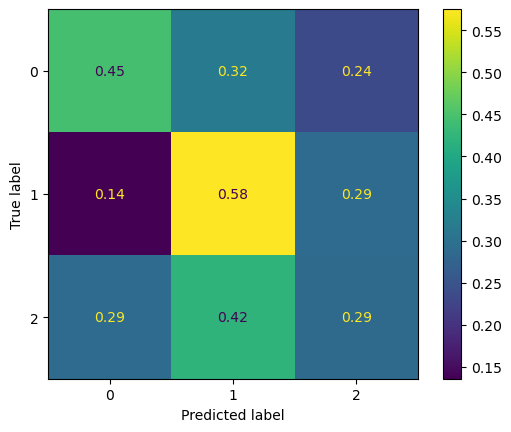

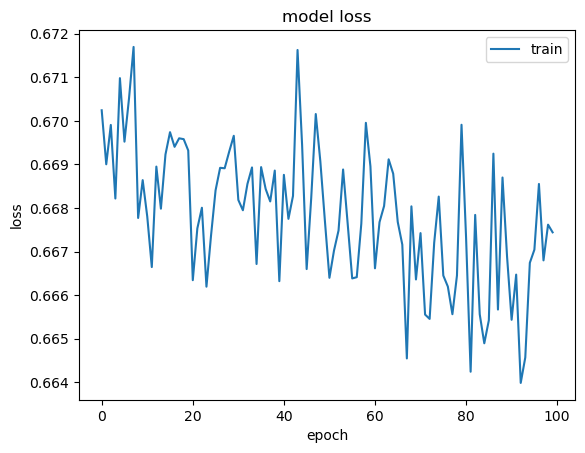

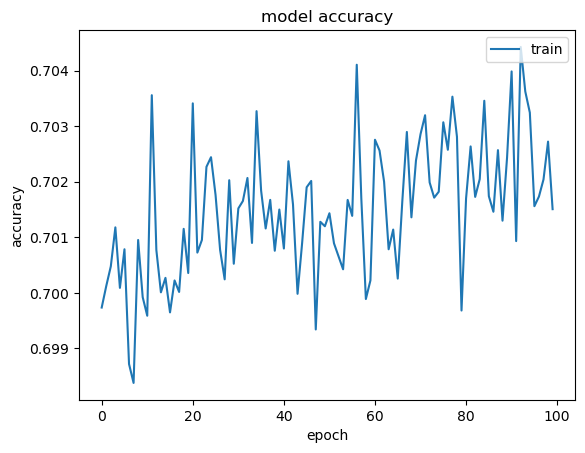

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6673 - accuracy: 0.7007 - val_loss: 1.3220 - val_accuracy: 0.4752
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6673 - accuracy: 0.7011 - val_loss: 1.3026 - val_accuracy: 0.4696
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6673 - accuracy: 0.7017 - val_loss: 1.2978 - val_accuracy: 0.4813
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6647 - accuracy: 0.7035 - val_loss: 1.3308 - val_accuracy: 0.4819
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6649 - accuracy: 0.7031 - val_loss: 1.3573 - val_accuracy: 0.4697
Epoch 6/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6665 - accuracy: 0.7028 - val_loss: 1.3054 - val_accuracy: 0.4951
Epoch 7/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6674 - accuracy: 0.7014 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6638 - accuracy: 0.7036 - val_loss: 1.3133 - val_accuracy: 0.4854
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6638 - accuracy: 0.7038 - val_loss: 1.3117 - val_accuracy: 0.4863
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6632 - accuracy: 0.7031 - val_loss: 1.3658 - val_accuracy: 0.4560
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6648 - accuracy: 0.7031 - val_loss: 1.3625 - val_accuracy: 0.4881
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6647 - accuracy: 0.7034 - val_loss: 1.3292 - val_accuracy: 0.4855
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6644 - accuracy: 0.7028 - val_loss: 1.2710 - val_accuracy: 0.4744
Epoch 63/100
8320/8320 [==============================] - 31s 4ms/step - loss: 0.6638 - accuracy: 0.7034 - val_loss: 1

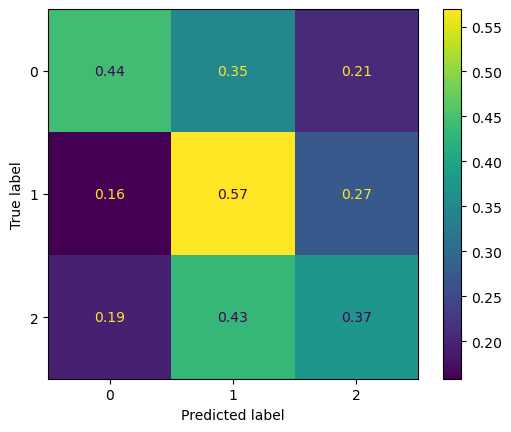

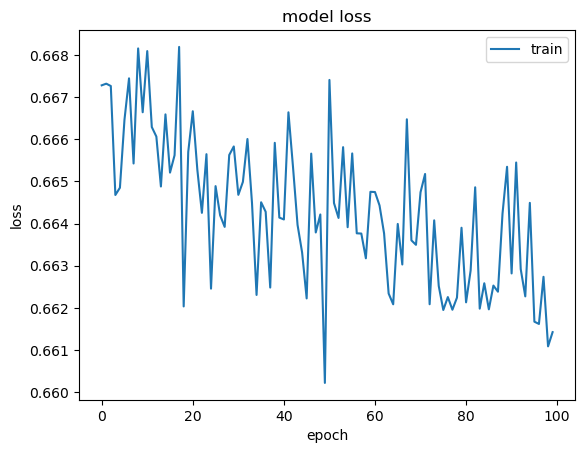

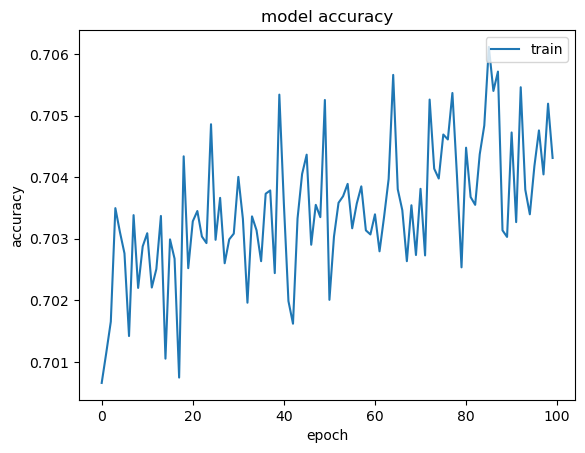

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6649 - accuracy: 0.7039 - val_loss: 1.2561 - val_accuracy: 0.4758
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6607 - accuracy: 0.7054 - val_loss: 1.3307 - val_accuracy: 0.4742
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6662 - accuracy: 0.7031 - val_loss: 1.2508 - val_accuracy: 0.4772
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6624 - accuracy: 0.7040 - val_loss: 1.2989 - val_accuracy: 0.4645
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6655 - accuracy: 0.7020 - val_loss: 1.2827 - val_accuracy: 0.4726
Epoch 6/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6619 - accuracy: 0.7040 - val_loss: 1.2920 - val_accuracy: 0.4599
Epoch 7/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6614 - accuracy: 0.7059 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6609 - accuracy: 0.7045 - val_loss: 1.3103 - val_accuracy: 0.4677
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6605 - accuracy: 0.7055 - val_loss: 1.3148 - val_accuracy: 0.4628
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6607 - accuracy: 0.7055 - val_loss: 1.3192 - val_accuracy: 0.4765
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6620 - accuracy: 0.7041 - val_loss: 1.2605 - val_accuracy: 0.4658
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6622 - accuracy: 0.7054 - val_loss: 1.2812 - val_accuracy: 0.4748
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6613 - accuracy: 0.7048 - val_loss: 1.2532 - val_accuracy: 0.4855
Epoch 63/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6615 - accuracy: 0.7042 - val_loss: 1

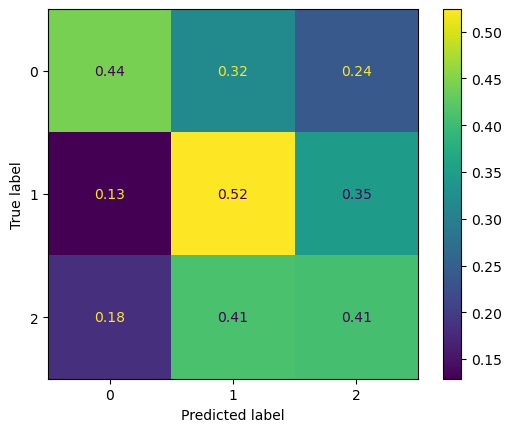

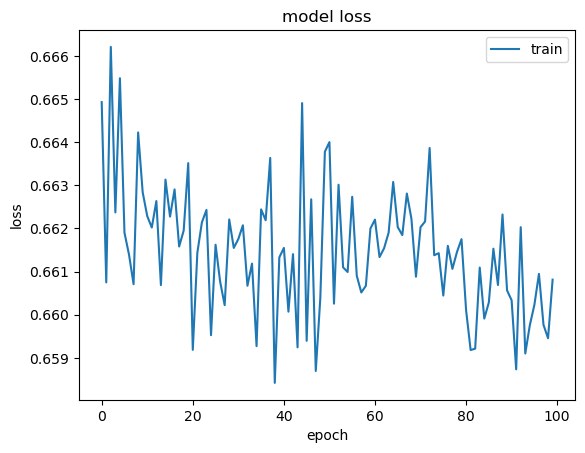

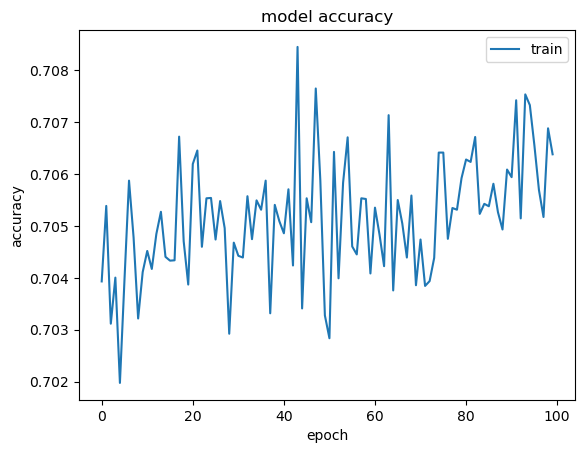

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6627 - accuracy: 0.7041 - val_loss: 1.1602 - val_accuracy: 0.5219
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6632 - accuracy: 0.7044 - val_loss: 1.2310 - val_accuracy: 0.4770
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6620 - accuracy: 0.7043 - val_loss: 1.1962 - val_accuracy: 0.4826
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6617 - accuracy: 0.7049 - val_loss: 1.1842 - val_accuracy: 0.5007
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6606 - accuracy: 0.7060 - val_loss: 1.2135 - val_accuracy: 0.4674
Epoch 6/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6581 - accuracy: 0.7068 - val_loss: 1.1931 - val_accuracy: 0.5155
Epoch 7/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6592 - accuracy: 0.7053 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6592 - accuracy: 0.7068 - val_loss: 1.2481 - val_accuracy: 0.4642
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6565 - accuracy: 0.7083 - val_loss: 1.2390 - val_accuracy: 0.4819
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6591 - accuracy: 0.7071 - val_loss: 1.2198 - val_accuracy: 0.4718
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6594 - accuracy: 0.7061 - val_loss: 1.2481 - val_accuracy: 0.4640
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6602 - accuracy: 0.7050 - val_loss: 1.1946 - val_accuracy: 0.4990
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6586 - accuracy: 0.7055 - val_loss: 1.2137 - val_accuracy: 0.4612
Epoch 63/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6563 - accuracy: 0.7086 - val_loss: 1

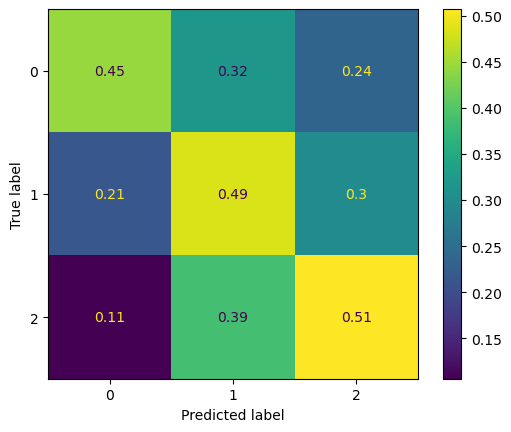

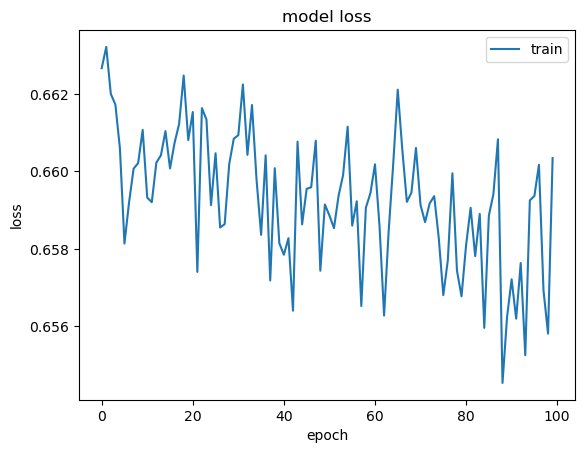

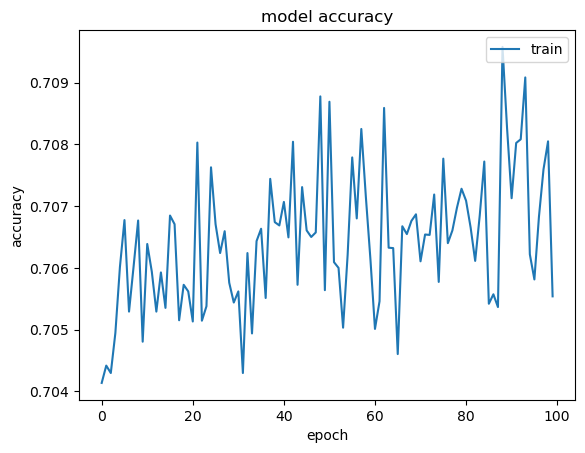

(149745, 1)
Epoch 1/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6562 - accuracy: 0.7072 - val_loss: 1.3885 - val_accuracy: 0.4272
Epoch 2/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6587 - accuracy: 0.7073 - val_loss: 1.3344 - val_accuracy: 0.4632
Epoch 3/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6585 - accuracy: 0.7067 - val_loss: 1.3791 - val_accuracy: 0.4568
Epoch 4/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6577 - accuracy: 0.7066 - val_loss: 1.3646 - val_accuracy: 0.4744
Epoch 5/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6547 - accuracy: 0.7083 - val_loss: 1.3523 - val_accuracy: 0.4510
Epoch 6/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6577 - accuracy: 0.7070 - val_loss: 1.3673 - val_accuracy: 0.4434
Epoch 7/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6614 - accuracy: 0.7046 - val_lo

Epoch 57/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6594 - accuracy: 0.7062 - val_loss: 1.3630 - val_accuracy: 0.4379
Epoch 58/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6585 - accuracy: 0.7076 - val_loss: 1.3419 - val_accuracy: 0.4573
Epoch 59/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6595 - accuracy: 0.7068 - val_loss: 1.3193 - val_accuracy: 0.4737
Epoch 60/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6581 - accuracy: 0.7066 - val_loss: 1.3242 - val_accuracy: 0.4645
Epoch 61/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6566 - accuracy: 0.7072 - val_loss: 1.3390 - val_accuracy: 0.4686
Epoch 62/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6554 - accuracy: 0.7086 - val_loss: 1.3790 - val_accuracy: 0.4576
Epoch 63/100
8320/8320 [==============================] - 29s 3ms/step - loss: 0.6562 - accuracy: 0.7071 - val_loss: 1

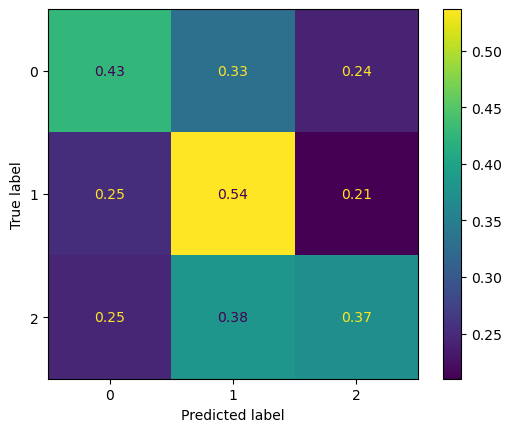

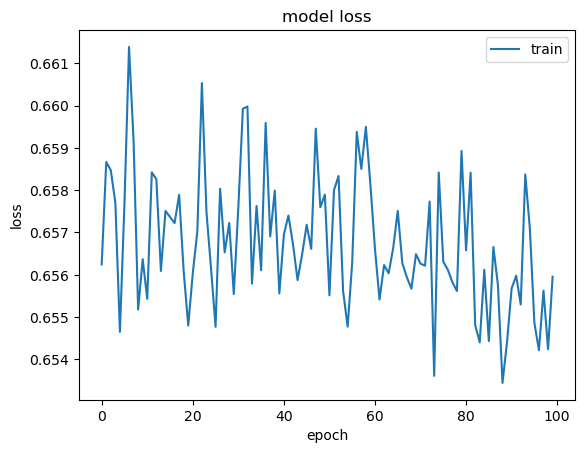

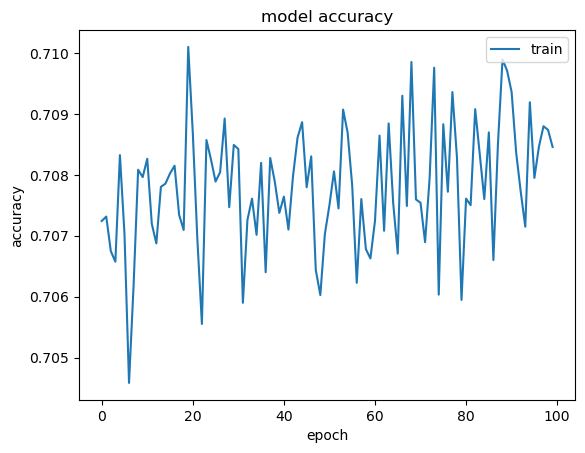

In [7]:
for i in range(10):
    X_test = empty
    X_train = empty
    y_test = empty
    y_train = empty
    y_test_list = []

    for j in range(322):
        X_temp_test = X.iloc[Count_2 * j + Count_1 * i:Count_2 * j + Count_1 * (i + 1)]
        X_test = pd.concat([X_test, X_temp_test])
        X_temp_train = X.iloc[Count_2 * j + Count_1:Count_2 * (j + 1)]
        X_train = pd.concat([X_train, X_temp_train])

        y_temp_test = y.iloc[Count_2 * j + Count_1 * i:Count_2 * j + Count_1 * (i + 1)]
        y_test = pd.concat([y_test, y_temp_test])
        y_temp_train = y.iloc[Count_2 * j + Count_1:Count_2 * (j + 1)]
        y_train = pd.concat([y_train, y_temp_train])

    #     print('SMOTE 적용 전 Train 레이블 값 분포: \n', y_train.value_counts())
    #     print('SMOTE 적용 전 Test 레이블 값 분포: \n', y_test.value_counts())

    # SMOTE 적용
    smote = SMOTE(random_state=0)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    X_test, y_test = smote.fit_resample(X_test, y_test)
    #     print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_test.shape, y_test.shape)
    #     print('SMOTE 적용 후 Train 레이블 값 분포: \n', y_train.value_counts())
    #     print('SMOTE 적용 후 Test 레이블 값 분포: \n', y_test.value_counts())

    # 원핫인코딩
    # 예시 : 1 , 2 -> (1,0) , (0,1)
    X_train = X_train.values
    X_test = X_test.values
    # y_train = y_train.values
    # y_test = y_test.values

    X_train = X_train.reshape(X_train.shape[0], 6, 1)
    X_test = X_test.reshape(X_test.shape[0], 6, 1)

    # 원핫인코딩
    # 예시 : 1 , 2 -> (1,0) , (0,1)

    print(y_train.shape)
    # y_train = pd.get_dummies(y_train)
    # y_test = pd.get_dummies(y_test)

    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)

    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=18)
    model.summary()
    predicted = model.predict(X_test)
    results = model.evaluate(X_test, y_test, batch_size=18)
    print("[{}]Accuracy : {}".format(i, results[1]))


    predicted = pd.DataFrame(predicted)
    y_test = pd.DataFrame(y_test)
    predicted = predicted.idxmax(axis=1)
    y_test = y_test.idxmax(axis=1)

    #     print("predicted",predicted)
    #     print("y_test",y_test)

    # f1score
    f1 = f1_score(y_test, predicted, average='weighted')
    print("[{}]F1score : {}".format(i, f1))
    # precision/recall
    p_rlist = sk(y_test, predicted, average='weighted')
    print("[{}]Precision : {}".format(i, p_rlist[0]))
    print("[{}]Recall : {}".format(i, p_rlist[1]))
    print()
    # 결과 배열에 넣기
    Result[i][0] = results[1]
    Result[i][1] = f1
    Result[i][2] = p_rlist[0]
    Result[i][3] = p_rlist[1]
    del results
    del f1
    del p_rlist

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_test, predicted, labels=[0, 1, 2], normalize="true")
    CMResult[i] = cm
    print(CMResult[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot()
    filename = ("ConfusionMatrix_" + str(i))
    plt.savefig(filename + ".png")
    plt.show()

    LossResult[i] = history.history['loss']
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    filename = ("LossGraph_" + str(i))
    plt.savefig(filename + ".png")
    plt.show()

    AccuracyResult[i] = history.history['accuracy']
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    filename = ("AccuracyGraph_" + str(i))
    plt.savefig(filename + ".png")
    plt.show()

    del filename

In [8]:
Result_df=pd.DataFrame(Result, columns=['Accuracy','F1-Score','Precision','Recall'])
Result_df

print("Average of Accuracy {}".format(Result_df['Accuracy'].mean()))
print("Average of F1-Score {}".format(Result_df['F1-Score'].mean()))
print("Average of Precision {}".format(Result_df['Precision'].mean()))
print("Average of Recall {}".format(Result_df['Recall'].mean()))

Matrix=pd.DataFrame(Result_df['Accuracy'],columns=['Accuracy'])
Matrix['Accuracy'] = Result_df['Accuracy']
A = [Result_df['Accuracy'].mean(), Result_df['F1-Score'].mean(), Result_df['Precision'].mean(), Result_df['Recall'].mean()]
A = pd.DataFrame(A, columns=['Accuracy'])
Matrix = pd.concat([Matrix,A])
Matrix = Matrix.transpose()
Matrix.to_excel('./PFMatrix_LSTM2.xlsx')

Average of Accuracy 0.4655756652355194
Average of F1-Score 0.46521531206697586
Average of Precision 0.47415571329195744
Average of Recall 0.465575662745845


In [9]:
AverageLossResult=[0 for j in range(100)]
AverageAccuracyResult=[0 for j in range(100)]

for i in range(10):
    for j in range(100):
#         print(i,j)
        AverageLossResult[j]=AverageLossResult[j]+LossResult[i][j]
        AverageAccuracyResult[j]=AverageAccuracyResult[j]+AccuracyResult[i][j]
for k in range(100):
    AverageLossResult[k]=AverageLossResult[k]/10
    AverageAccuracyResult[k]=AverageAccuracyResult[k]/10

    plt.plot(AverageLossResult)
    plt.title('Train Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    filename = ("LossGraph")
    plt.savefig(filename + ".png")
    plt.show()

    plt.plot(AverageAccuracyResult)
    plt.title('Train Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper right')
    filename = ("AccuracyGraph")
    plt.savefig(filename + ".png")
    plt.show()

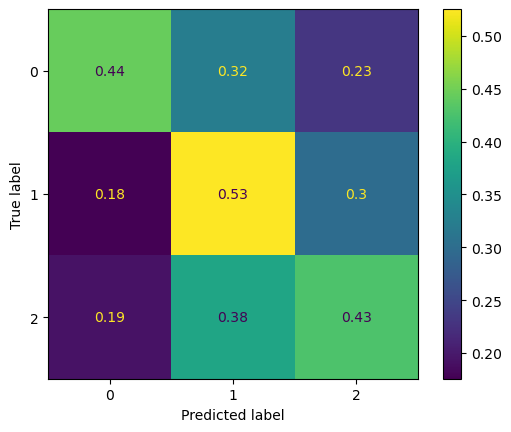

In [11]:
import numpy as np

AverageCM = [[0 for i in range(3)] for j in range(3)]

for i in range(10):
    for j in range(3):
        for k in range(3):
            AverageCM[j][k] = AverageCM[j][k] + CMResult[i][j][k]

for j in range(3):
    for k in range(3):
        AverageCM[j][k] = AverageCM[j][k] / 10

AverageCM = np.array(AverageCM)
disp = ConfusionMatrixDisplay(confusion_matrix=AverageCM, display_labels=[0, 1, 2])
disp.plot()
filename = ("LSTM_ConfusionMatrix")
plt.savefig(filename + ".png")
plt.show()